In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Add confusion_matrix here
from sklearn.metrics import ConfusionMatrixDisplay # Import for displaying the confusion matrix


# Cargar el dataset
dataset = pd.read_csv('diabetes.csv')

# Mostrar las primeras filas
df = (dataset.head())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# Separar las características (X) y la variable objetivo (y)
X = dataset.iloc[:, :-1].values  # Las primeras 8 columnas son características
y = dataset.iloc[:, -1].values   # La última columna es la clase objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Crear el modelo MLPClassifier con 2 capas ocultas de 10 neuronas cada una y softmax en la capa de salida
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=1000, random_state=42, verbose=True)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Calcular la precisión (accuracy)
accuracy = mlp.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy}")


Iteration 1, loss = 0.68135011
Iteration 2, loss = 0.67106624
Iteration 3, loss = 0.66188557
Iteration 4, loss = 0.65332838
Iteration 5, loss = 0.64545251
Iteration 6, loss = 0.63799150
Iteration 7, loss = 0.63094923
Iteration 8, loss = 0.62399413
Iteration 9, loss = 0.61742853
Iteration 10, loss = 0.61112957
Iteration 11, loss = 0.60454138
Iteration 12, loss = 0.59841941
Iteration 13, loss = 0.59249842
Iteration 14, loss = 0.58691509
Iteration 15, loss = 0.58120513
Iteration 16, loss = 0.57605777
Iteration 17, loss = 0.57042945
Iteration 18, loss = 0.56531776
Iteration 19, loss = 0.56049017
Iteration 20, loss = 0.55588088
Iteration 21, loss = 0.55180147
Iteration 22, loss = 0.54778358
Iteration 23, loss = 0.54375743
Iteration 24, loss = 0.53966482
Iteration 25, loss = 0.53606731
Iteration 26, loss = 0.53246245
Iteration 27, loss = 0.52916523
Iteration 28, loss = 0.52637509
Iteration 29, loss = 0.52379138
Iteration 30, loss = 0.52105638
Iteration 31, loss = 0.51852880
Iteration 32, los

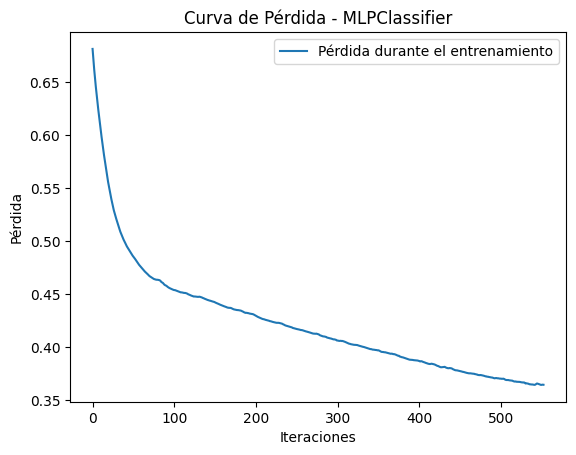

In [30]:
# Graficar la curva de pérdida
plt.plot(mlp.loss_curve_, label='Pérdida durante el entrenamiento')
plt.title('Curva de Pérdida - MLPClassifier')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


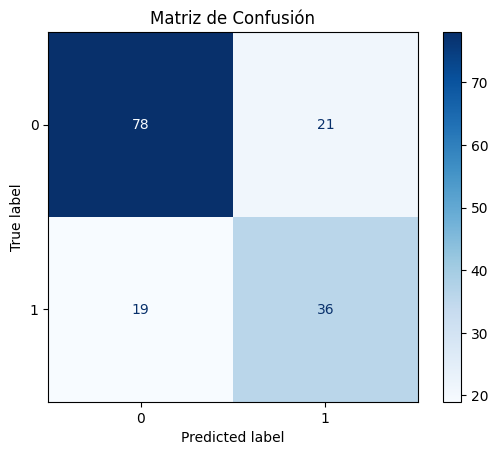

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



In [31]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5042 - loss: 0.7672 - val_accuracy: 0.6299 - val_loss: 0.7000
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6305 - loss: 0.6717 - val_accuracy: 0.6883 - val_loss: 0.6476
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6730 - loss: 0.6192 - val_accuracy: 0.6818 - val_loss: 0.6094
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6824 - loss: 0.5889 - val_accuracy: 0.7078 - val_loss: 0.5850
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.5656 - val_accuracy: 0.6948 - val_loss: 0.5677
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6907 - loss: 0.5502 - val_accuracy: 0.7143 - val_loss: 0.5537
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: 0.5174 - val_accuracy: 0.7273 - val_loss: 0.5453
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7431 - loss: 0.5028 - val_accuracy: 0.7403 - val_loss: 0.

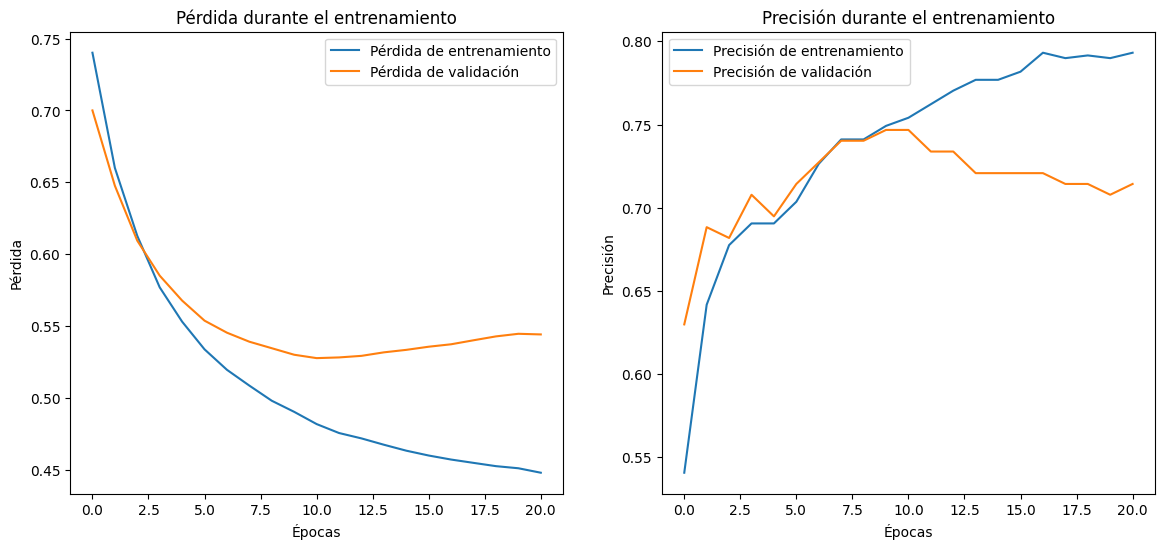

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Separar características (X) y etiquetas (y)
X = data.iloc[:, :-1].values  # Las primeras 7 columnas como características
y = data.iloc[:, -1].values   # La última columna como etiqueta (multiclase)

# Convertir las etiquetas a formato categórico (one-hot encoding)
y = to_categorical(y)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))  # Capa de entrada con 8 nodos y capa oculta de 16 nodos
model.add(Dense(8, activation='relu'))  # Capa oculta con 8 nodos
model.add(Dense(y.shape[1], activation='softmax'))  # Capa de salida con softmax para multiclase

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Definir early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping])

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss:.4f}')
print(f'Precisión en el conjunto de prueba: {accuracy:.4f}')

# Gráficos de la pérdida y la precisión
plt.figure(figsize=(14, 6))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()
